# BadSensorFinder Demo - Plotting the SVM Hyperplane

In [1]:
import os

In [2]:
os.chdir('../optidrift/')

In [108]:
import badsensorfinder
import pickle
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import getdata
%matplotlib inline

## Build the model you want to plot the hyperplane of:
Documentation of how to use this code can be found in the main readme or in the example demo files for BadSensorFinder.  


**Important:** In order to visualize the hyperplane, there can only be two features fed into the svm model, so if LASSO initially suggests more than two features, reduce that feature set down to 2 before the model is built. This may be a poorer model than if more features were used, but for the purpose of visualization there can only be two features. 

Please input the sensor to build a model for (must match column name exactly): CH1CDWFLO
Please review the loaded data, take note if there are date ranges to be excluded.


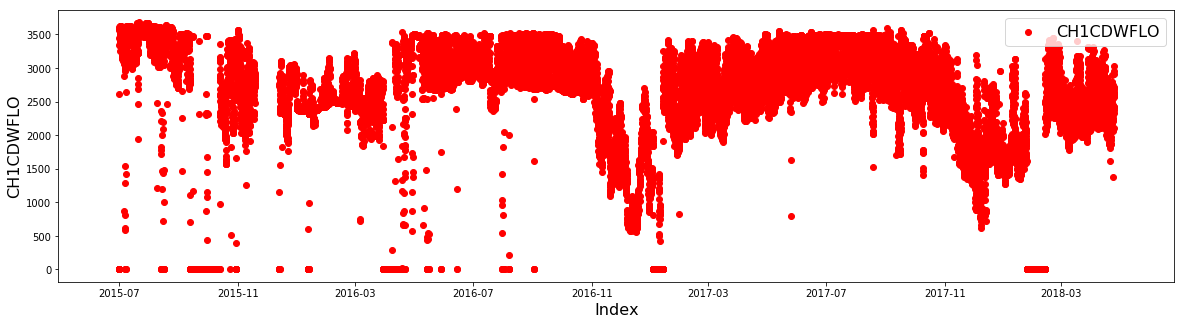

Is there any data that should be excluded from the model training data? (y/n): n
Input the start date of training data: 2016-08-01
Input the end date of training data: 2016-08-30
Input the start date of validation data: 2016-09-01
Input the end date of validation data: 2016-09-30


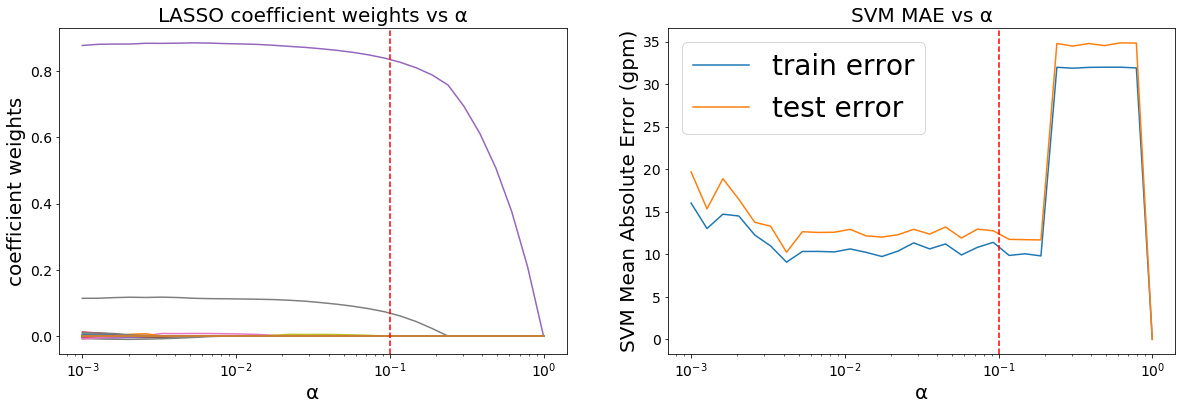

The features at the selected alpha are: Index(['CDWP1SPD', 'CDWP1kW'], dtype='object')
Would you like to attempt another alpha? (y/n): n
These are the features that LASSO selected: ['CDWP1SPD', 'CDWP1kW']
Would you like to change the features? (y/n): n
Here is the final feature set: ['CDWP1SPD', 'CDWP1kW']
Input the model name to save this as (example.sav): CH1CDWFLO625.sav
the model score is: 0.9965093695086288
the mean absolute error is: 11.362958268973296
Please input the allowable error in this sensor (|predicted - actual|): 250


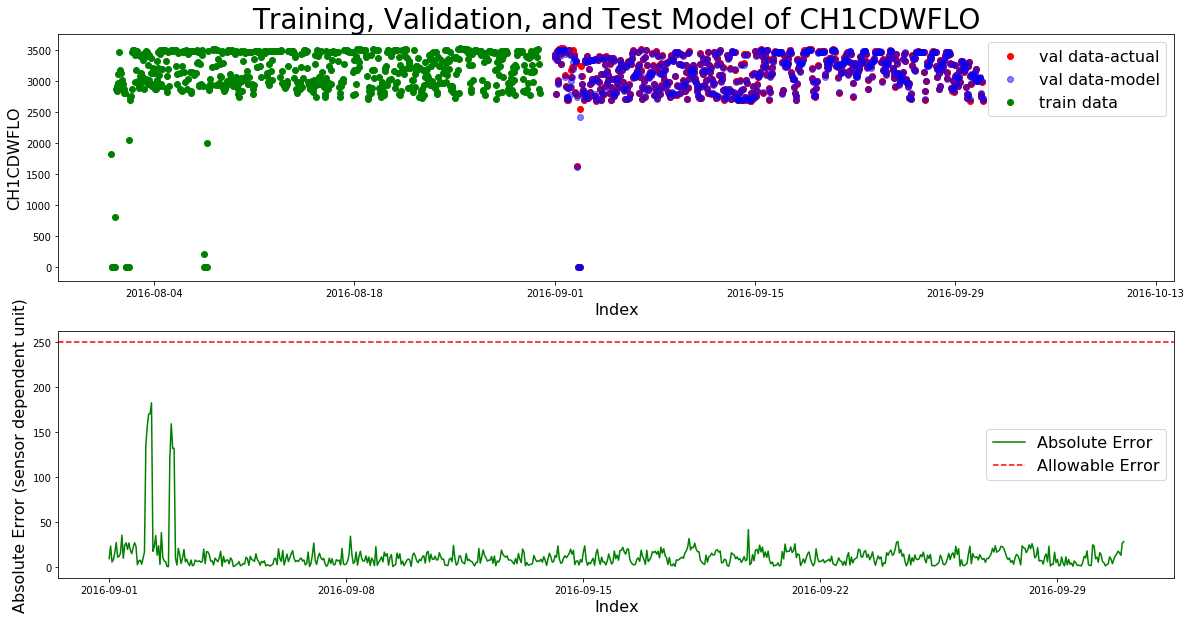

Would you like to test the model on the month subsequent to the validation data? If that data is not available in the folder, answer "n" (y/n): n
Would you like to see another set of training/validation/testing data? (y/n): n


()

In [4]:
badsensorfinder.drift_finder()

## Get the data into a dataframe using the getdata function 

Please review the loaded data, take note if there are date ranges to be excluded.


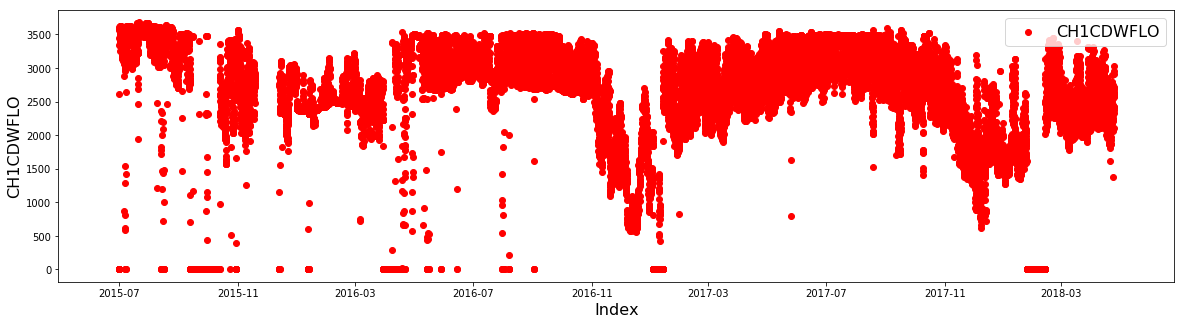

Is there any data that should be excluded from the model training data? (y/n): n


In [5]:
df = getdata.process_data('../Data/h_data/', 'CH1CDWFLO')

## Plot the hyperplane and the datapoints

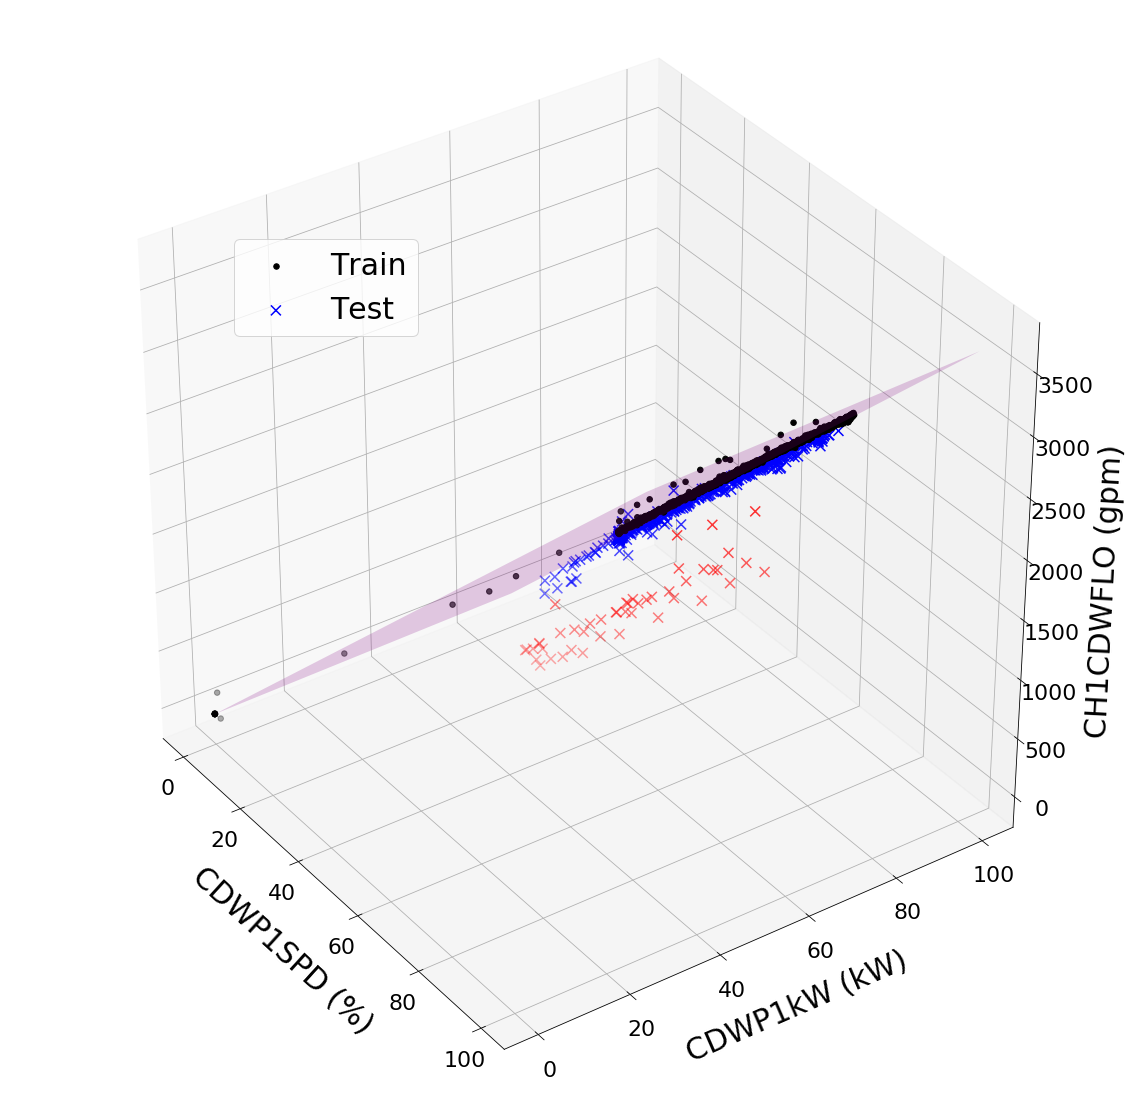

In [112]:
%matplotlib inline
#%matplotlib qt
#this makes the plots appear in a separate window outside of this notebook 
obj = 'CH1CDWFLO'
# change this to whichever sensor you are exploring
df_train = df['2016-08-01':'2016-09-30']
df_test = df['2016-10-01':'2016-11-10']
features = ['CDWP1SPD', 'CDWP1kW']
#change these to the two features from the build model function. 
savepickleas = '../saved_models/CH1CDWFLO625.sav'
#change this to the path to the model matching the sensor.
feat1 = 'CDWP1SPD'
feat2 = 'CDWP1kW'
#these have to be in the order matching the features variable-
#which has to match the order of features fed into the svm (get from above code)

df_train = df_train.dropna(subset = features)
df_test = df_test.dropna(subset = features)
#df_test = df_test.sample(frac=0.2)
#df_train = df_train.sample(frac=0.2)

test_y = df_test[obj]
test_x = df_test[features]

train_y = df_train[obj]
train_x = df_train[features]



loaded_model = pickle.load(open(savepickleas, 'rb'))
predict_test = loaded_model.predict(test_x)
predict_train = loaded_model.predict(train_x)
#df_test1 = pd.DataFrame(test_y)
df_test['Predicted'] = predict_test
df_train['Predicted'] = predict_train
df_test= df_test.sort_values(by = feat1)
df_train = df_train.sort_values(by = feat1)

df_test = df_test.reset_index()
df_test['warning'] = None
for i in range(len(df_test)):
    if abs(df_test.loc[i,('Predicted')]-df_test.loc[i,(obj)]) > 250:
        #this threshold can also be changed to whatever is appropriate for the sensor
        #this is the same question as "what is the allowable error in the sensor"
        df_test.loc[i,('warning')] = True
    else: 
        df_test.loc[i,('warning')] = False
#print(df_test.shape, df_test1.shape)

df_testsample = df_test.sample(frac=0.5)
df_trainsample = df_train.sample(frac=1)


#df_total = pd.concat([df_test, df_train])
#df_total = df_total.sort_values(by = feat1)

a = loaded_model.coef_
#xx = [np.linspace(0,100), np.linspace(0,100)]
#yy = np.dot(a,xx) + loaded_model.intercept_[0]
xx, yy = np.meshgrid((0,100), (0,100))
#this can be changed to the appropriate ranges

zz =  a[0]*xx+a[1]*yy+loaded_model.intercept_[0]
#this is the plane we want to plot

fig = plt.figure(figsize = (20,20), facecolor = 'w', edgecolor = 'k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_trainsample[feat1], df_trainsample[feat2], df_trainsample[obj], color = 'black', s = 30, label = 'Train', marker = 'o')
ax.plot_surface(xx, yy, zz, color = 'magenta', alpha = 0.2)
ax.scatter(df_testsample[feat1], df_testsample[feat2], df_testsample[obj], c = df_testsample['warning'], cmap = 'bwr', s =100, marker = 'x', label= 'Test')
ax.set_xlabel(feat1 + ' (%)')
ax.set_ylabel(feat2 + ' (kW)')
ax.set_zlabel(obj + ' (gpm)')
ax.xaxis.label.set_fontsize(30)
ax.yaxis.label.set_fontsize(30)
ax.zaxis.label.set_fontsize(30)
ax.tick_params(axis = 'both',labelsize = 22, pad = 10)
ax.yaxis.labelpad = 30
ax.xaxis.labelpad = 30
ax.zaxis.labelpad = 30
ax.legend(fontsize = 30, loc = (0.2, 0.7))
ax.view_init(elev= 35, azim = -35)
#25, -45
plt.show()


In [113]:
fig.savefig('../docs/OEGitPics/GOODHyperplane3.png', dpi = 900)